In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
# Load cleaned data
df = pd.read_csv("cleaned_churn_data.csv")

# --- Feature Engineering ---
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['plan_type', 'country'], drop_first=True)

In [19]:
# Define features and target
X = df_encoded.drop(columns=['customer_id', 'churned', 'last_payment_date'])
y = df_encoded['churned']

In [26]:
print(df['churned'].value_counts(normalize=True))


churned
0    0.7
1    0.3
Name: proportion, dtype: float64


In [27]:
print(X_train.std(axis=0))

[1.02040624 0.99165742 0.99922633 1.00617184 1.00195187 0.98663079
 1.02522436 0.99077063]


In [28]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

LogisticRegression

In [30]:
# --- Train model ---
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [31]:
# --- Predictions ---
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [32]:
# --- Evaluation ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.59      0.64        70
           1       0.29      0.40      0.34        30

    accuracy                           0.53       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.57      0.53      0.55       100


Confusion Matrix:
[[41 29]
 [18 12]]



Accuracy: 0.53
Precision: 0.29
Recall: 0.40
F1 Score: 0.34
ROC AUC: 0.50


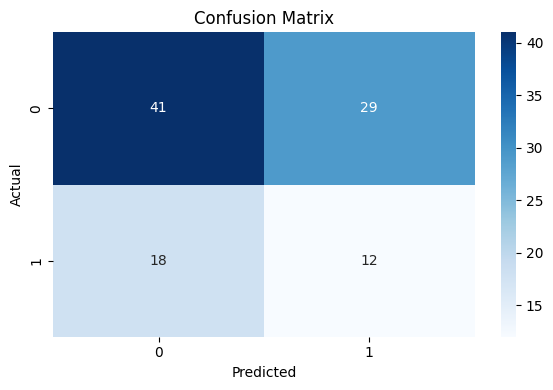

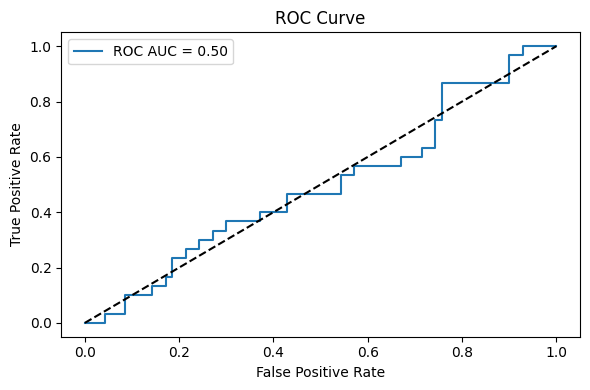

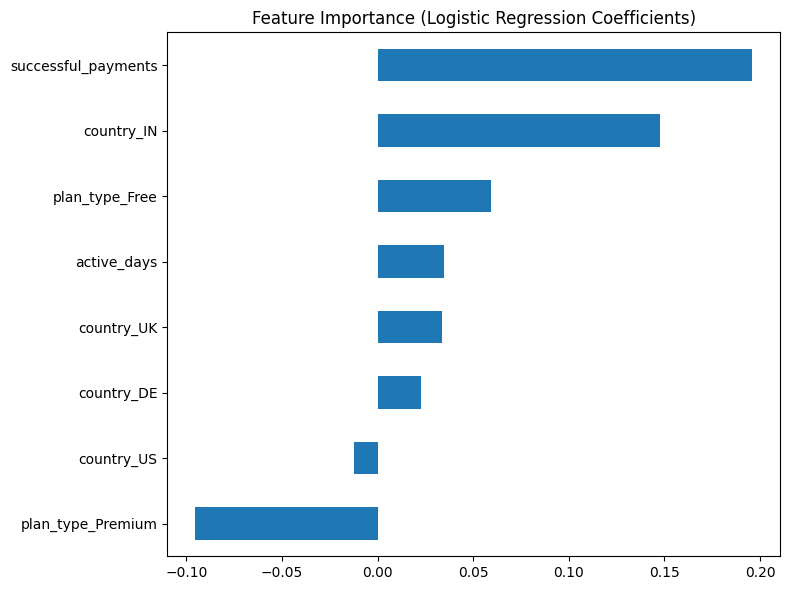

In [33]:
# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nAccuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# --- Visualizations ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance
coefficients = model.coef_[0]
features = X.columns
feature_importance = pd.Series(coefficients, index=features).sort_values()

plt.figure(figsize=(8, 6))
feature_importance.plot(kind='barh')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()

Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model = RandomForestClassifier(class_weight={0:1, 1:3}, random_state=42)

In [41]:
# Train model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=42)

In [42]:
# --- Predictions ---
y_pred = model.predict(X_test)
if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test)[:, 1]
else:
    y_prob = model.decision_function(X_test)
    y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Min-max scaling


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78        70
           1       0.31      0.13      0.19        30

    accuracy                           0.65       100
   macro avg       0.50      0.50      0.48       100
weighted avg       0.58      0.65      0.60       100


Confusion Matrix:
[[61  9]
 [26  4]]

Accuracy: 0.65
Precision: 0.31
Recall: 0.13
F1 Score: 0.19
ROC AUC: 0.57


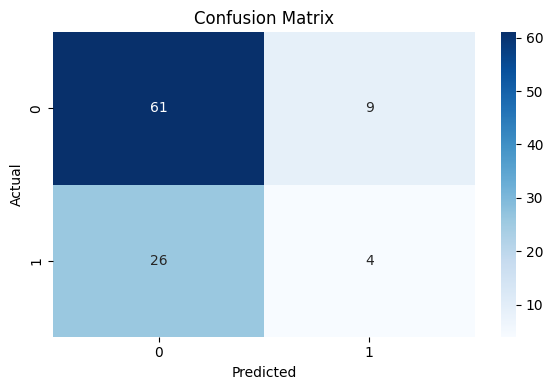

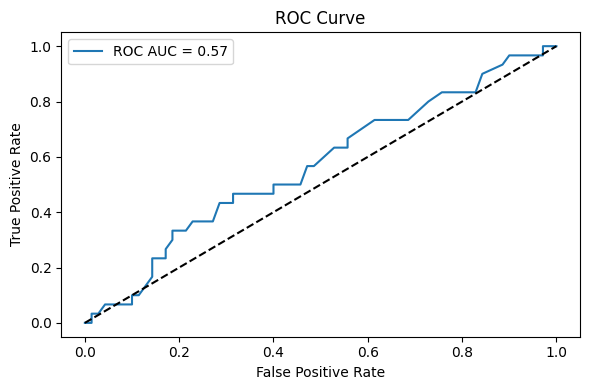

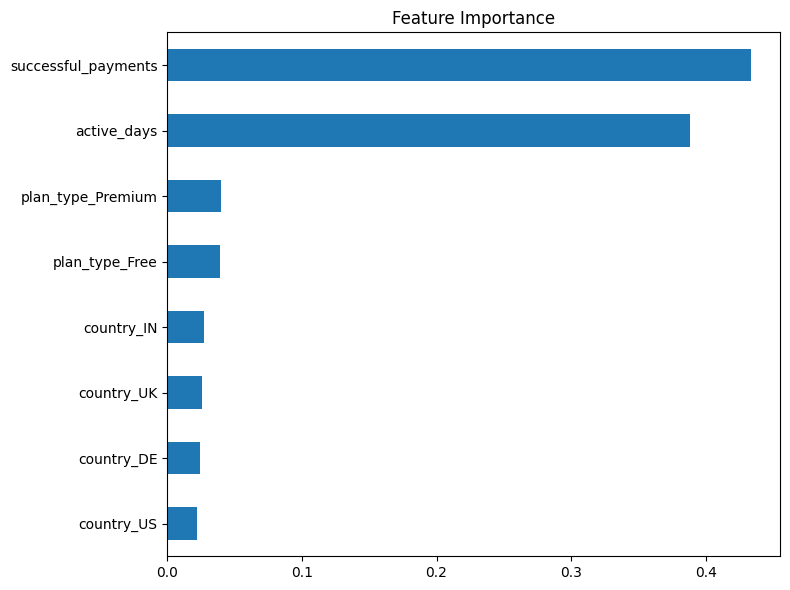

In [43]:
# --- Evaluation ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nAccuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# --- Visualizations ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

# Feature Importance (if available)
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    features = X.columns
    feature_importance = pd.Series(importances, index=features).sort_values()

    plt.figure(figsize=(8, 6))
    feature_importance.plot(kind='barh')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
